In [129]:

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 
import yfinance as yfin 
from pandas_datareader import data as pdr
import warnings

In [130]:
precos = pd.DataFrame()
carteira = ['ITUB3.SA', 'BBDC3.SA', 'BBAS3.SA', 'SANB3.SA', '^BVSP']

#carteira = ['SNFF11.SA', 'SNCI11.SA', 'MXRF11.SA', 'RECR11.SA', 'XPCI11.SA', '^BVSP']

for i in carteira:
    precos[i] = pdr.get_data_yahoo(i, '2010-01-01')['Adj Close']

precos.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ITUB3.SA,BBDC3.SA,BBAS3.SA,SANB3.SA,^BVSP
Date,,,,,
2010-01-04 00:00:00-02:00,7.956397,5.357145,13.014684,6.264181,70045.0
2010-01-05 00:00:00-02:00,7.969211,5.283366,12.884102,6.536538,70240.0
2010-01-06 00:00:00-02:00,7.969211,5.252244,12.901510,6.536538,70729.0
2010-01-07 00:00:00-02:00,7.892335,5.240141,12.905863,6.264181,70451.0
2010-01-08 00:00:00-02:00,7.802653,5.247057,12.979856,6.264181,70263.0


In [131]:
precos.rename(columns={'ITUB3.SA':'ITUB', 'BBDC3.SA':'BBDC', 'BBAS3.SA':'BBAS', 'SANB3.SA':'SANB', '^BVSP':'IBOV'}, inplace = True)
precos['IBOV'] = precos['IBOV']/1000

precos.reset_index(inplace=True)

precos.head()


,Date,ITUB,BBDC,BBAS,SANB,IBOV
0,2010-01-04 00:00:00-02:00,7.956397,5.357145,13.014684,6.264181,70.045
1,2010-01-05 00:00:00-02:00,7.969211,5.283366,12.884102,6.536538,70.240
2,2010-01-06 00:00:00-02:00,7.969211,5.252244,12.901510,6.536538,70.729
3,2010-01-07 00:00:00-02:00,7.892335,5.240141,12.905863,6.264181,70.451
4,2010-01-08 00:00:00-02:00,7.802653,5.247057,12.979856,6.264181,70.263


In [132]:
vaz_df = precos[precos.isna().any(axis=1)]
display(vaz_df.head())

precos.dropna(subset=['IBOV'], inplace = True)
precos.IBOV.isnull().sum()


,Date,ITUB,BBDC,BBAS,SANB,IBOV
496,2012-01-02 00:00:00-02:00,7.726185,5.663524,12.059862,4.366794,NaN
1844,2017-06-15 00:00:00-03:00,17.115582,11.787313,20.167337,10.406600,NaN
1904,2017-09-07 00:00:00-03:00,19.266626,14.610256,24.282240,12.657226,NaN
1929,2017-10-12 00:00:00-03:00,20.510075,15.537919,27.784149,12.403955,NaN
1944,2017-11-02 00:00:00-02:00,19.558176,14.045326,25.258312,12.545334,NaN


0

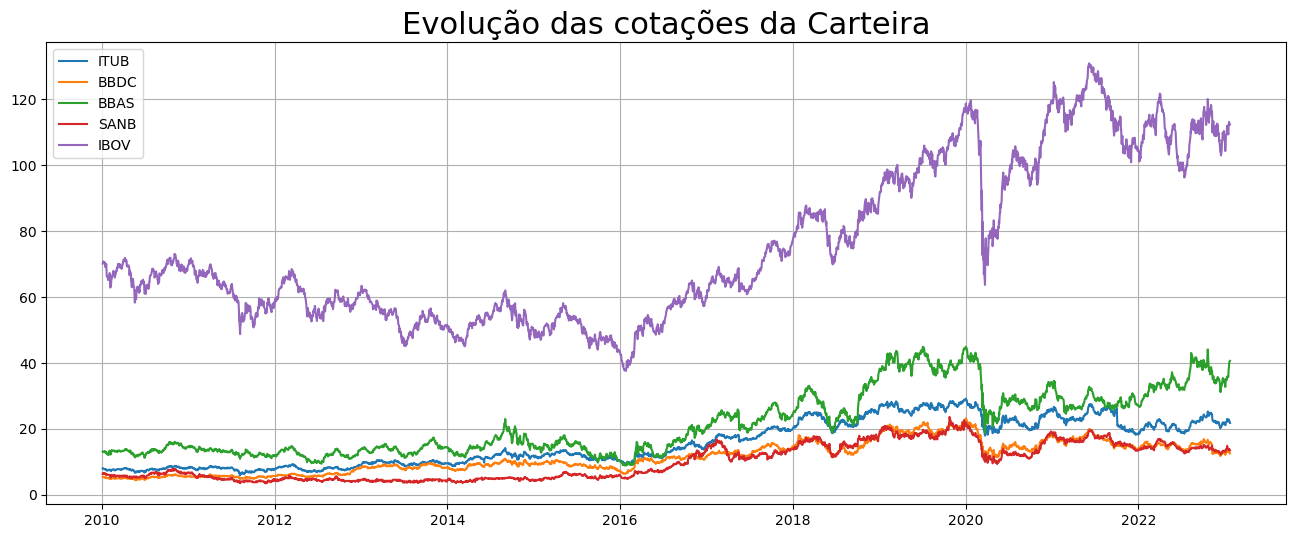

In [133]:
carteira = list(precos.drop(['Date'], axis = 1).columns)
plt.figure(figsize=(16,6))

for i in carteira:
    plt.plot(precos['Date'], precos[i])

plt.legend(carteira)
plt.grid()
plt.title('Evolução das cotações da Carteira', fontsize= 22)
plt.show()

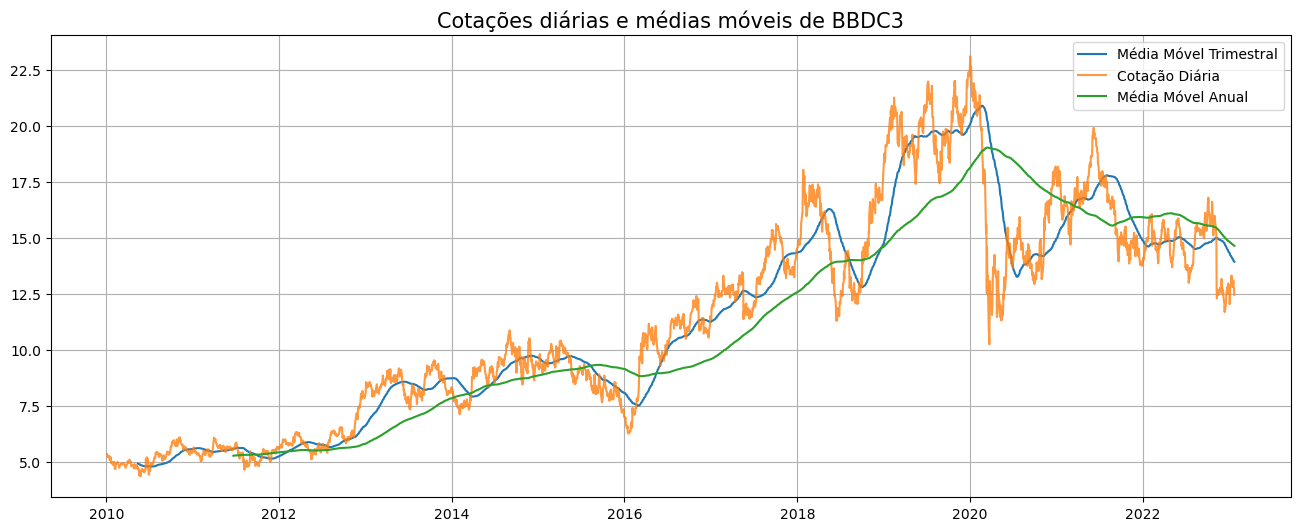

In [134]:
plt.figure(figsize=(16,6))
plt.plot(precos['Date'], precos['BBDC'].rolling(window = 90).mean())
plt.plot(precos['Date'], precos['BBDC'], alpha = 0.8)
plt.plot(precos['Date'], precos['BBDC'].rolling(window = 365).mean())
plt.grid()
plt.title('Cotações diárias e médias móveis de BBDC3', fontsize= 15)
plt.legend(['Média Móvel Trimestral', 'Cotação Diária', 'Média Móvel Anual'])
plt.show()

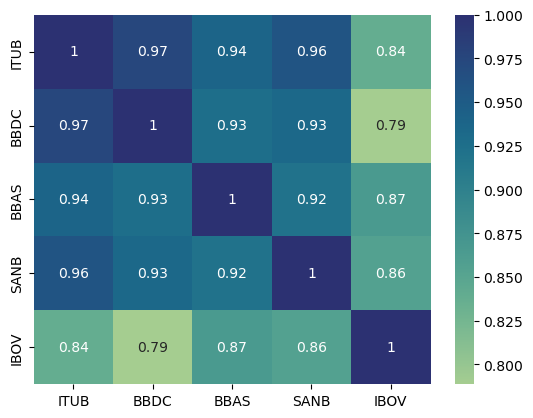

In [135]:
sns.heatmap(precos.corr(), annot = True, cmap='crest')
plt.show()

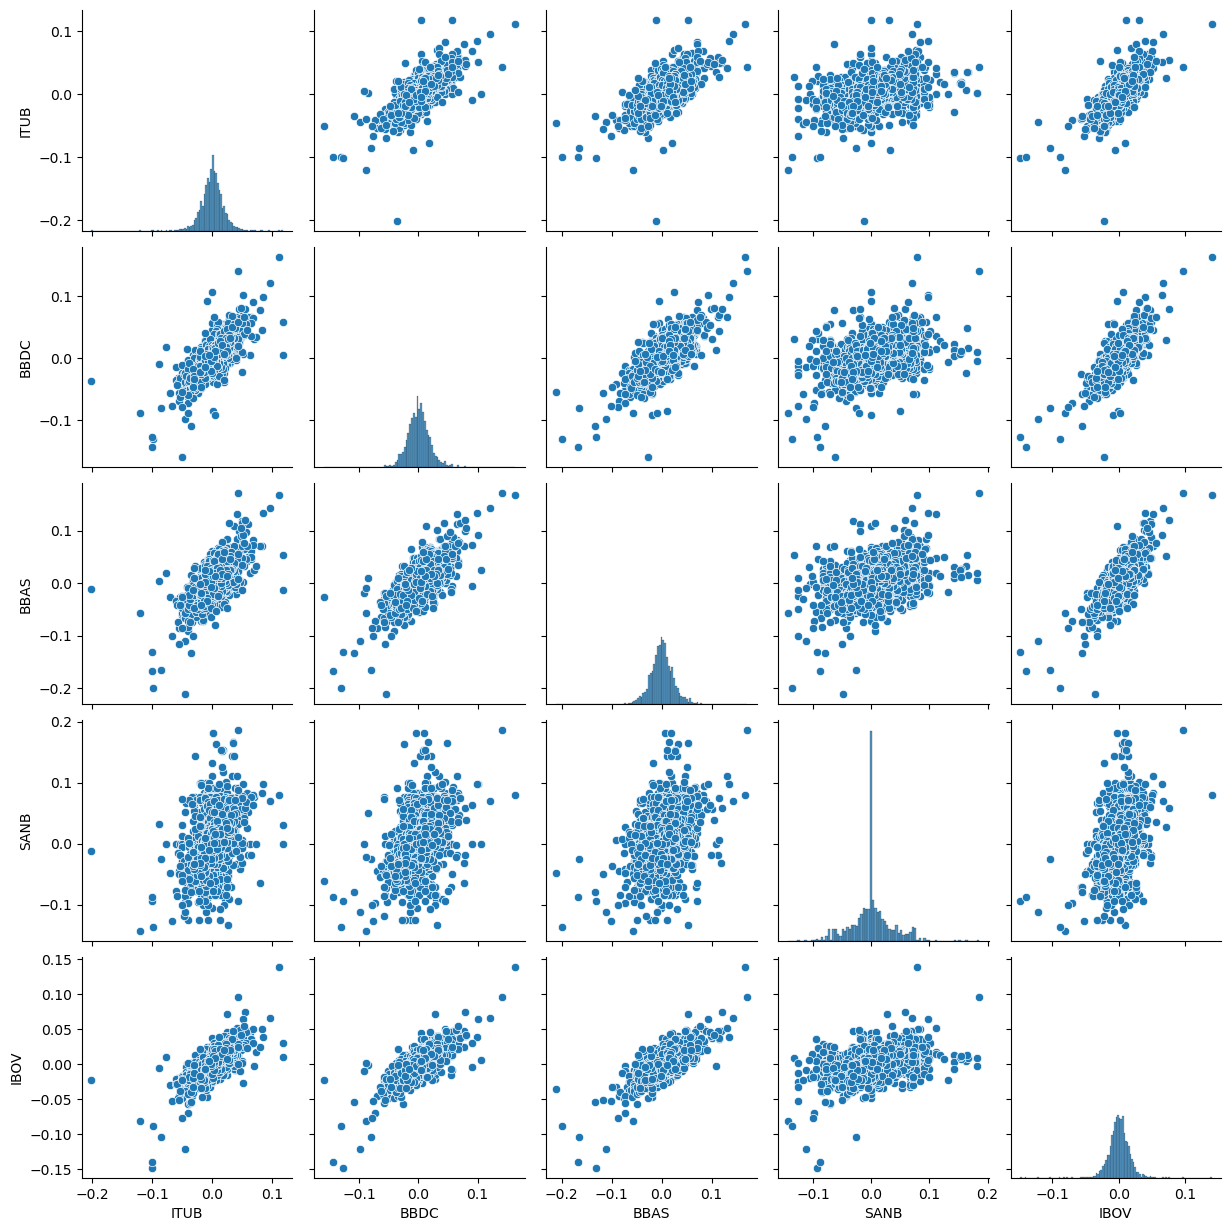

In [146]:
retorno = pd.DataFrame()

for i in carteira:
    retorno [i] = precos[i].pct_change()
retorno['Date'] = precos['Date']

retorno.dropna(subset=['IBOV'], inplace = True)

sns.pairplot(retorno)
plt.show()

In [137]:
retorno.describe()

,ITUB,BBDC,BBAS,SANB,IBOV
count,3231.000000,3231.000000,3231.000000,3231.000000,3231.000000
mean,0.000488,0.000485,0.000682,0.000885,0.000267
std,0.018788,0.021154,0.025650,0.036135,0.015483
min,-0.200718,-0.160126,-0.211712,-0.142857,-0.147797
25%,-0.009837,-0.011291,-0.013039,-0.014706,-0.008176
50%,0.000307,0.000000,0.000000,0.000000,0.000319
75%,0.010529,0.011681,0.013805,0.015217,0.008945
max,0.117471,0.163276,0.171261,0.185751,0.139082


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IBOV', ylabel='Density'>

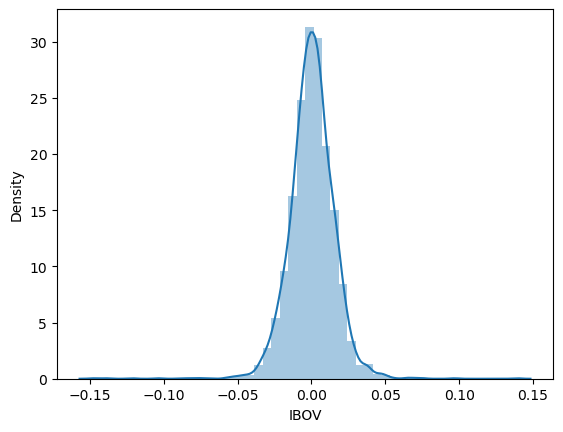

In [138]:
sns.distplot(retorno['IBOV'].dropna())

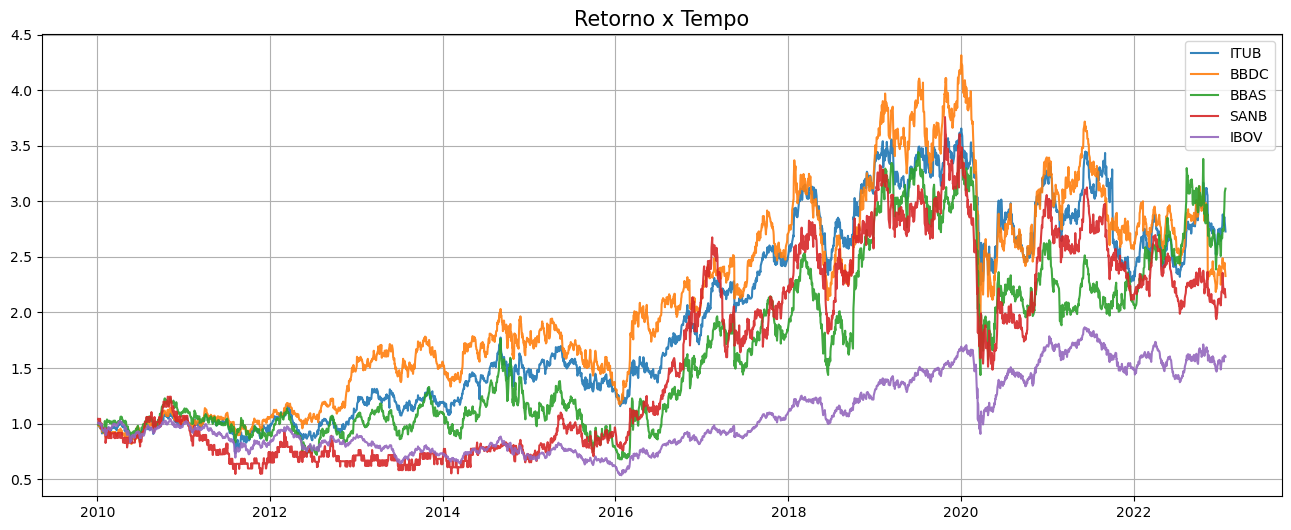

In [148]:
retorno_acum = pd.DataFrame()
for i in carteira: 
    retorno_acum[i] = (retorno[i]+1).cumprod()
retorno_acum['Date'] = retorno['Date']

retorno_acum.dropna(subset=['IBOV'], inplace = True)

retorno_acum.head()

plt.figure(figsize=(16,6))
plt.plot(retorno_acum['Date'], retorno_acum.drop(['Date'], axis = 1), alpha = 0.9)
plt.legend(carteira)
plt.title('Retorno x Tempo', fontsize = 15)
plt.grid()
plt.show()
